## FootballDecoded - Test Pass Network
### Prueba rápida de visualización de redes de pase

In [1]:
# Imports
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from match_data import extract_match_data, get_team_summary
from pass_network import (
    create_pass_network, 
    save_high_quality,
    # NUEVAS FUNCIONES:
    create_pass_network_by_halves,
    create_pass_network_single_half
)
plt.style.use('default')
%matplotlib inline

In [2]:
# Extraer/cargar datos (solo se extrae la primera vez)
print("🔍 Cargando datos del partido...")
match_data = extract_match_data(match_id=1825726, league="ESP-La Liga", season="2024-25")

🔍 Cargando datos del partido...
🎯 Procesando partido 1825726 (ESP-La Liga 2024-25)
   📂 Datos encontrados, cargando desde archivos...



🎯 Creando red de pases para Barcelona (Partido completo)


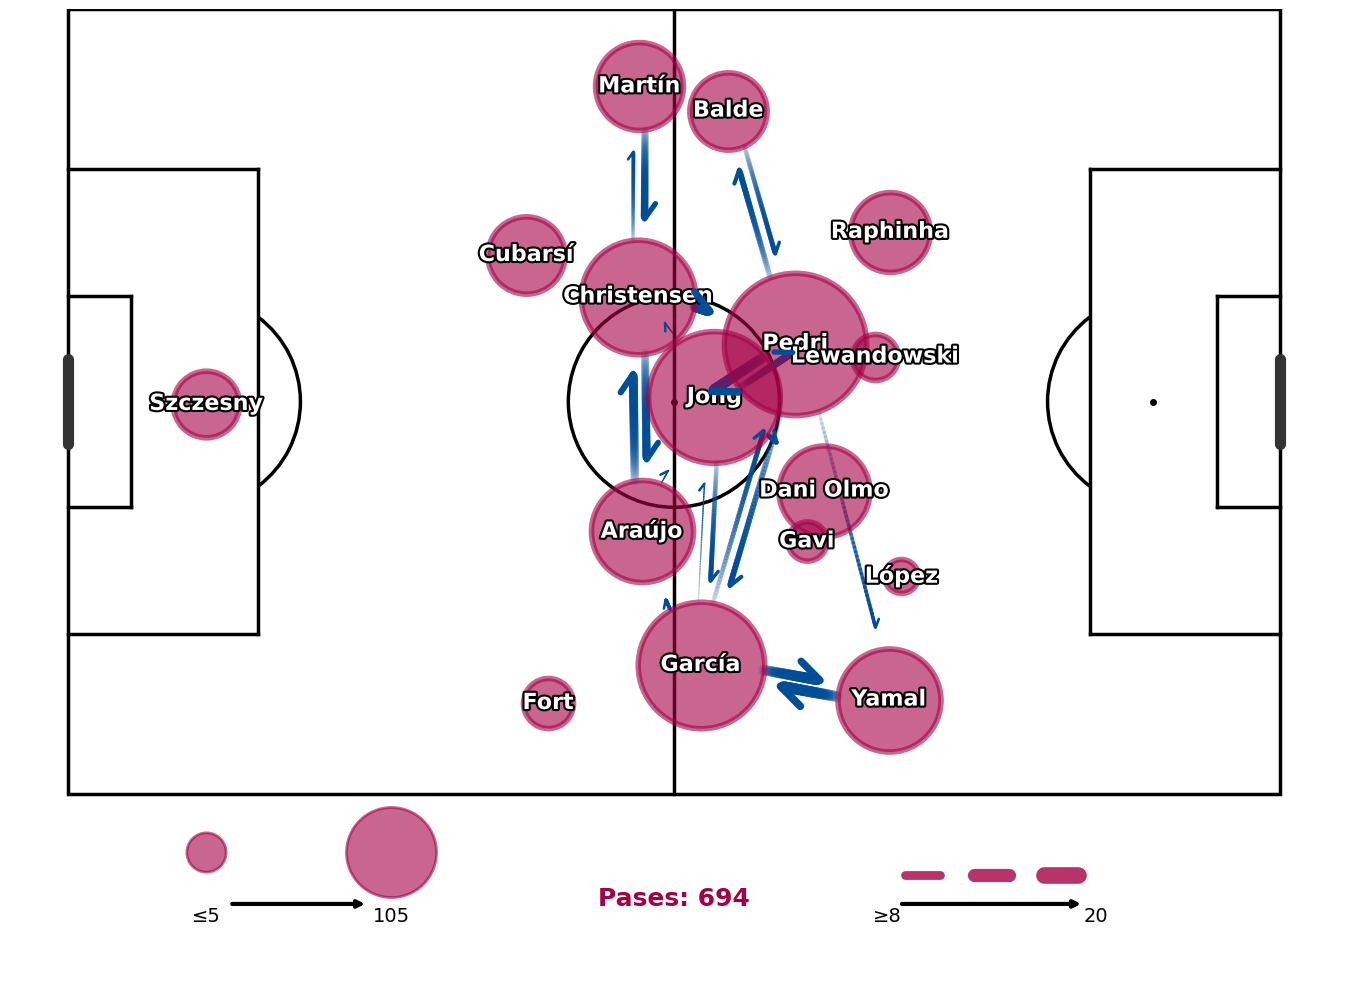


🎯 Creando red de pases para Espanyol (Partido completo)


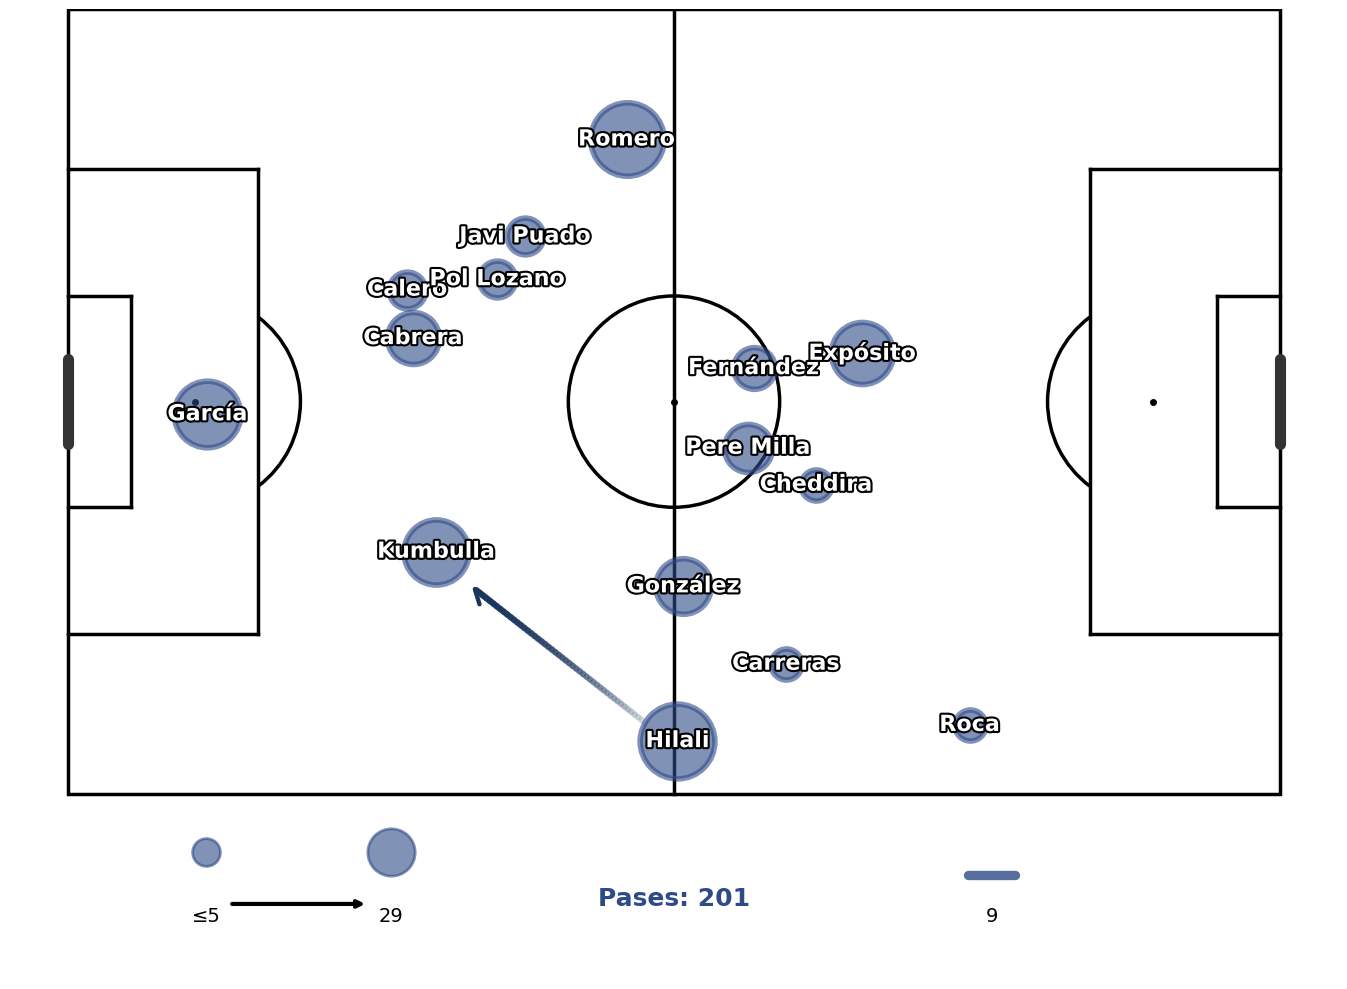

In [3]:
# 1. Partido completo
fig_complete = create_pass_network(match_data, "Barcelona", figsize=(14, 10))
plt.show()

# 1. Partido completo
fig_complete = create_pass_network(match_data, "Espanyol", figsize=(14, 10))
plt.show()